<a href="https://colab.research.google.com/github/AnshulNcode/ML/blob/main/Classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Test_jPKyvmK.csv to Test_jPKyvmK.csv


In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Train_eP48B9k.csv to Train_eP48B9k.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

train_data_classification = pd.read_csv("Train_eP48B9k.csv")
test_data_classification = pd.read_csv("Test_jPKyvmK.csv")

In [4]:
le = LabelEncoder()
for col in train_data_classification:
    if train_data_classification[col].dtype == "object":
        train_data_classification[col] = le.fit_transform(train_data_classification[col])
        test_data_classification[col] = le.fit_transform(test_data_classification[col])

In [5]:
Strain_data_classification.drop(['id','customer_age','balance','last_contact_duration','num_contacts_in_campaign','days_since_prev_campaign_contact'],axis=1,inplace=True)
test_data_classification.drop(['id','customer_age','balance','last_contact_duration','num_contacts_in_campaign','days_since_prev_campaign_contact'],axis=1,inplace=True)

In [6]:
y = train_data_classification['term_deposit_subscribed']
X = train_data_classification.drop('term_deposit_subscribed',axis=1)

X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_Train,y_Train)
predict = rf.predict(X_Test)

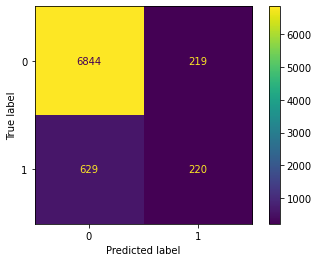

In [8]:
#CONFUSION MATRIX
confusion_mat = metrics.confusion_matrix(y_Test,predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=rf.classes_)
disp.plot()

In [9]:
#ACCURACY
tn, fp, fn, tp = metrics.confusion_matrix(y_Test, predict).ravel()

#using sklearn function
accuracy_using_sklearn = metrics.accuracy_score(y_Test,predict)
print (accuracy_using_sklearn)

#using the formula
accuracy_score_using_formula = (tp+tn)/(tp+tn+fp+fn)
print (accuracy_score_using_formula)

0.8928210313447927
0.8928210313447927


In [10]:
#ERROR
#using the formula 
error_rate_using_formula = (fp+fn)/(tp+tn+fp+fn)
print (error_rate_using_formula)

#using sklearn accuracy score
error_rate_using_sklearn = 1-metrics.accuracy_score(y_Test,predict)
print (error_rate_using_sklearn)

0.10717896865520728
0.10717896865520726


In [11]:
#RECALL
#using the formula 
recall = (tp)/(tp+fn)
print (recall)

#sklearn function
recall_score = metrics.recall_score(y_Test,predict)
print (recall_score)

0.2591283863368669
0.2591283863368669


In [12]:
#PRECISION
#using formula
Precision_using_formula = (tp) / (tp+fp)
print (Precision_using_formula)

#using sklearn function
Precision_using_sklearn = metrics.precision_score(y_Test,predict)
print (Precision_using_sklearn)

0.5011389521640092
0.5011389521640092


In [13]:
#F1 SCORE
F1_Score = metrics.f1_score(y_Test,predict)
print (F1_Score)

0.34161490683229817
